In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Versuch 3: Spracherkennung und Fourieranalyse

#### 1. Darstellung von Mundharmonika-Messung

M: 10004


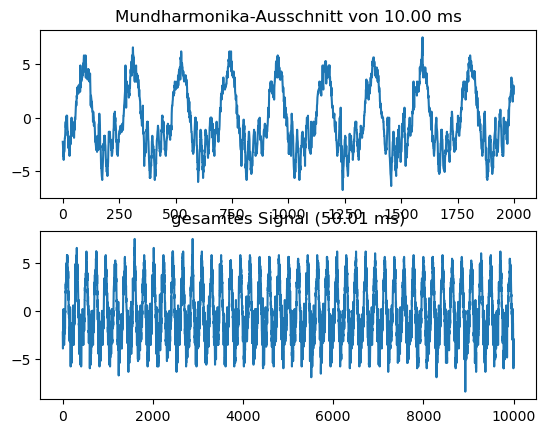

In [31]:
absPath = "D:/,.studium/HTWG/AIN/3/technische-grundlagen-der-kuenstlichen-intelligenz/versuch3"
mundharmonika = pd.read_csv(f"{absPath}/mundharmonika.csv", sep=';', decimal=',', header=1)
mundh = mundharmonika['(mV)']
N = len(mundh)

def dt(x): return mundharmonika['(ms)'][x] - mundharmonika['(ms)'][0]
def dts(x): return dt(x) / 1000

print(f"M: {mundh.size}")
fig, splt = plt.subplots(2)
splt[0].plot(mundh[0:2000])
splt[0].set_title(f'Mundharmonika-Ausschnitt von {dt(2000):.2f} ms')
splt[1].plot(mundh)
splt[1].set_title(f"gesamtes Signal ({dt(mundh.size - 1):.2f} ms)")
plt.show()

##### Angaben:
    Abtastpunkte = 10 004 (ca. 10 000)
    Signaldauer = 50.1 ms (ca. 50ms oder 1/20 s)
    Schwingungen = ca. 47 (gezählt)
Abtastzeit = ca. 0,005 ms = 5 µs => Abtastfrequenz = 200 000 Hz <br>
ungefähr 47 Schwingungen in 50 ms => Grundperiodendauer ca. 1.06 ms => Grundfrequenz: ca. 940 Hz


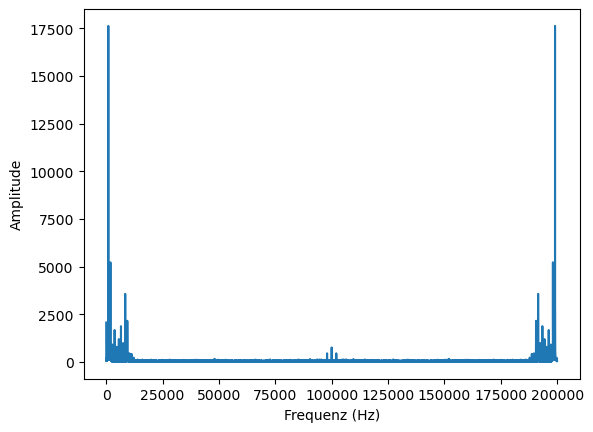

10004
Grundwellenzahl: 47 1/0.051s
Grundfrequenz: 939.6241503393834 Hz


In [49]:
ft = np.abs(np.fft.fft(mundh))
k = np.arange(N)
k = k / (mundh.size * dts(1)) # dts(1) = zeitlicher Abstand zwischen 2 Messpunkten in s
ftFreq = np.fft.fftfreq(mundh.size, 0.000005)
plt.plot(k, ft)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude')
plt.show()
print(ft.size)
grundwellenzahl = np.argmax(ft[0:5000])
grundfrequenz = k[grundwellenzahl]
print(f"Grundwellenzahl: {grundwellenzahl} 1/0.051s")
print(f"Grundfrequenz: {grundfrequenz} Hz")

## 2. Blablabla-Signal

2.1 Darstellung des Signals

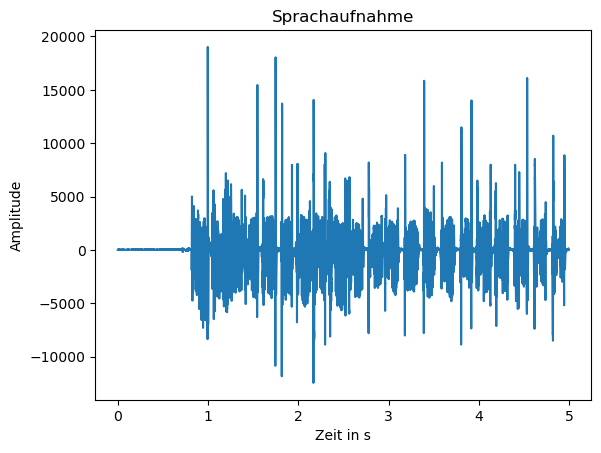

In [59]:
bla = np.load(f"{absPath}/blablabla.npy")
k = np.arange(bla.size)
samples = 44100
k = k / samples
plt.plot(k, bla)
plt.xlabel('Zeit in s')
plt.ylabel('Amplitude')
plt.title('Sprachaufnahme')
plt.show()

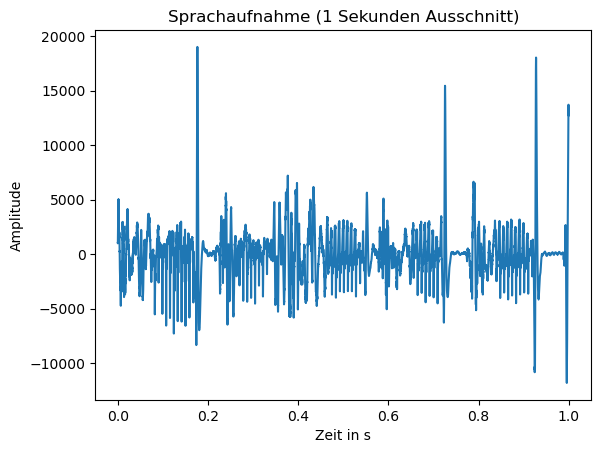

In [70]:
def firstOverVal(arr, grenzw) :
    for a in np.arange(arr.size):
        if(arr[a] >= grenzw): return a

startIndx = firstOverVal(bla, 1000)
endIndx = startIndx + samples
secondR = np.arange(samples) / samples

plt.plot(secondR, bla[startIndx : endIndx])
plt.xlabel('Zeit in s')
plt.ylabel('Amplitude')
plt.title('Sprachaufnahme (1 Sekunden Ausschnitt)')
plt.show()

Frequenz: 109 Hz


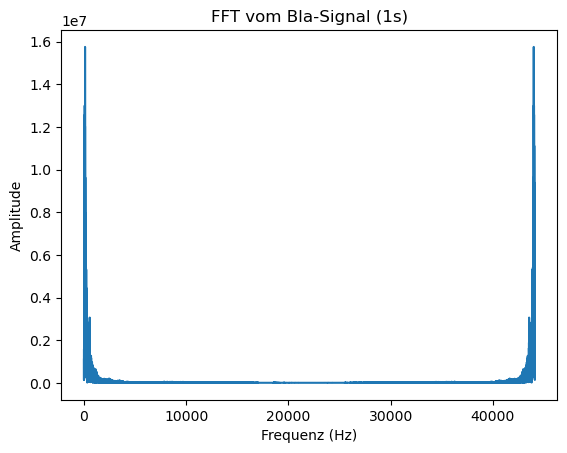

In [84]:
blaFT = np.abs(np.fft.fft(bla[startIndx:endIndx]))
plt.plot(blaFT)
freq = np.argmax(blaFT[0: int(samples /2)])
print(f"Frequenz: {freq} Hz")


plt.ylabel('Amplitude')
plt.xlabel('Frequenz (Hz)')
plt.title("FFT vom Bla-Signal (1s)")
plt.show()